### chandan G Y codesoft internship

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### importing the project dataframe

In [2]:
df=pd.read_csv("D:/data science projects/codesoft/Titanic-Dataset.csv")

#### look of df

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

#### checking statistical parameters of the df

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking any presence of null values in the dataframe

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### now in my df there are some variables which do not dependent on the survival predictions, those are passengers 'name', 'Ticket', 'PassengerId' and cabin is having missing values of 687 values out of total 891 data points, so i am going to drop all these mentioned variables 

In [8]:
df = df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1)

#### now i am doing the missing value imputation of 'Age' and 'Embarked' variables

In [9]:
#Age variable is filling with median value, and because of categorical Embarked variable it is taking with the mode value 
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#### now my prepared df is

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### now i am doing EDA

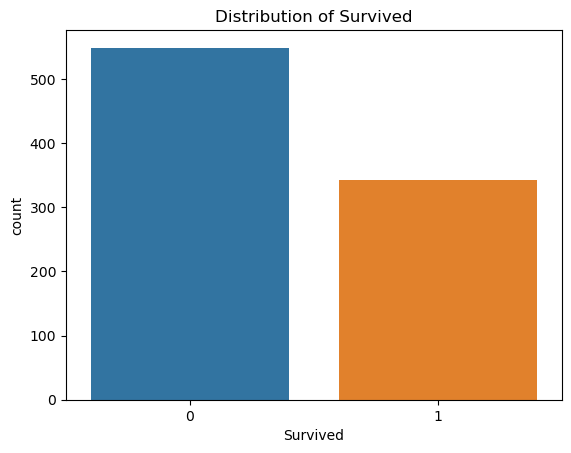

In [12]:
#distribution of the target variable 'Survived'
import seaborn as sns
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.show()

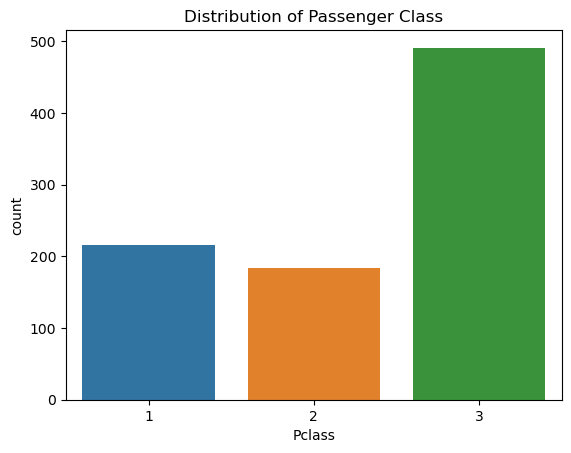

In [13]:
# distribution of 'Pclass' (Passenger Class)
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Class')
plt.show()

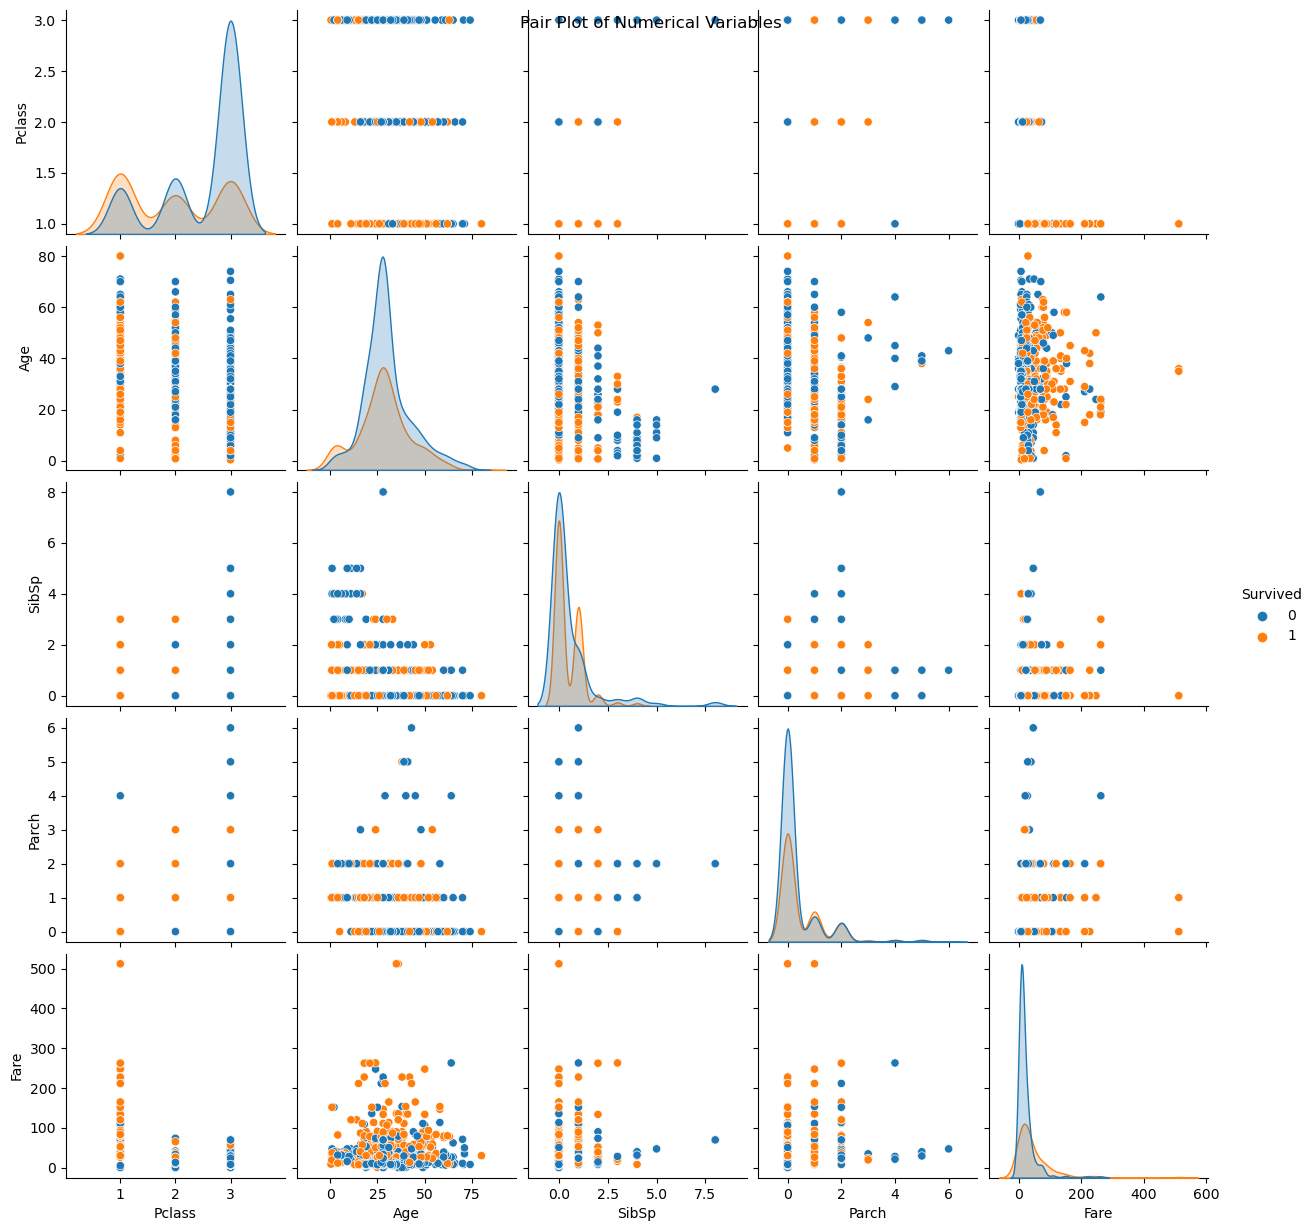

In [14]:
sns.pairplot(df, hue='Survived')
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()


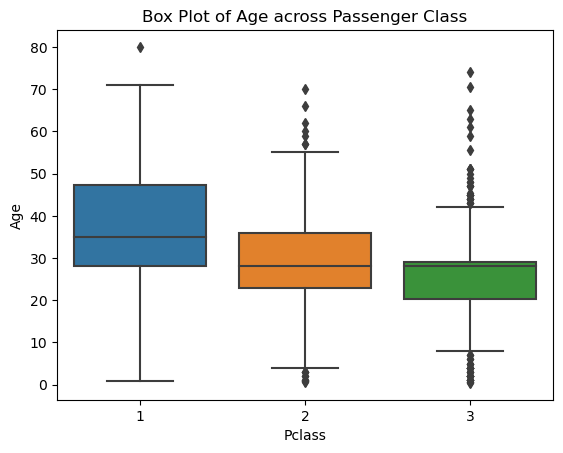

In [15]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Box Plot of Age across Passenger Class')
plt.show()
## Box plots show the distribution of a continuous variable and highlight key statistical measures

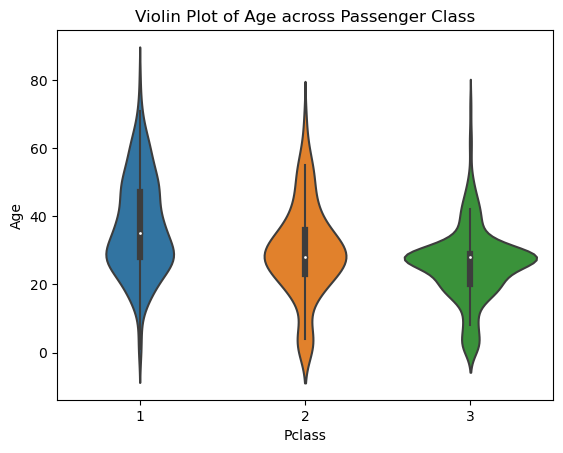

In [16]:
sns.violinplot(x='Pclass', y='Age', data=df)
plt.title('Violin Plot of Age across Passenger Class')
plt.show()
## Violin plots combine aspects of box plots and kernel density estimation to provide a more comprehensive view of the data distribution.

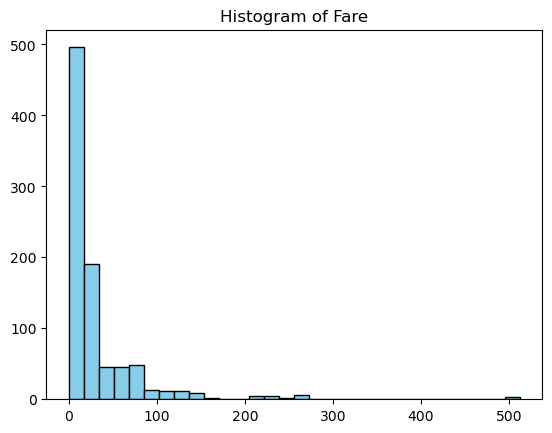

In [17]:
plt.hist(df['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Fare')
plt.show()


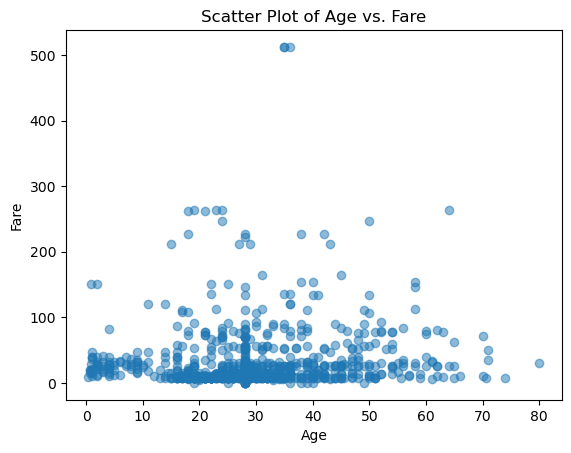

In [18]:
plt.scatter(x='Age', y='Fare', data=df, alpha=0.5)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_26572\1256883451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


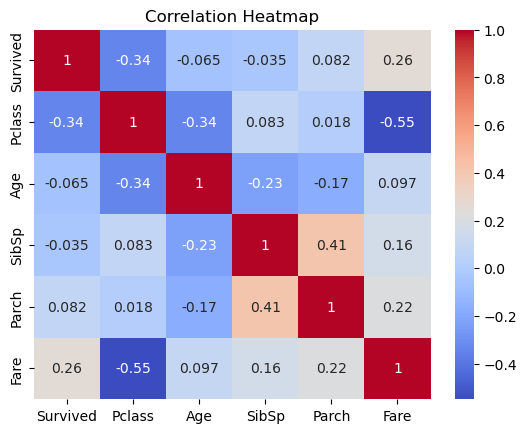

In [19]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


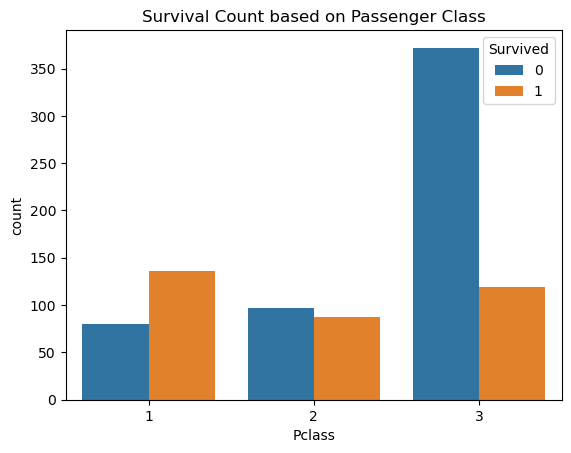

In [20]:
# relationship between 'Pclass' and 'Survived'
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count based on Passenger Class')
plt.show()

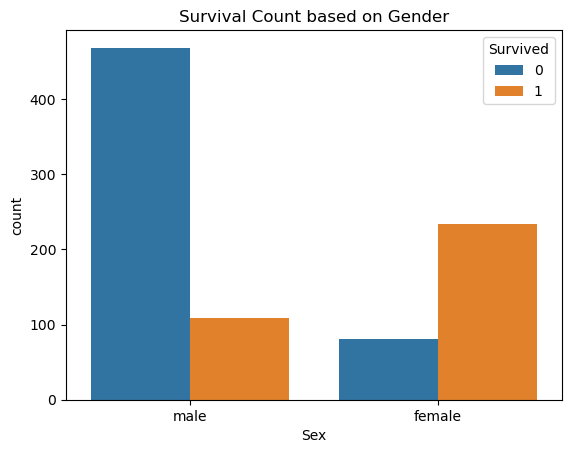

In [21]:
#  relationship between 'Sex' and 'Survived'
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count based on Gender')
plt.show()

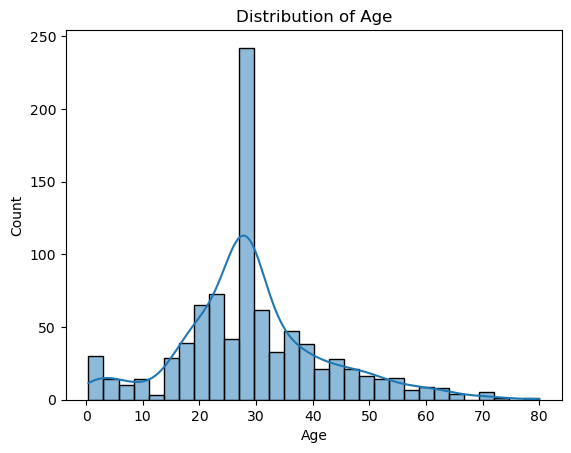

In [22]:
# distribution of 'Age'
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

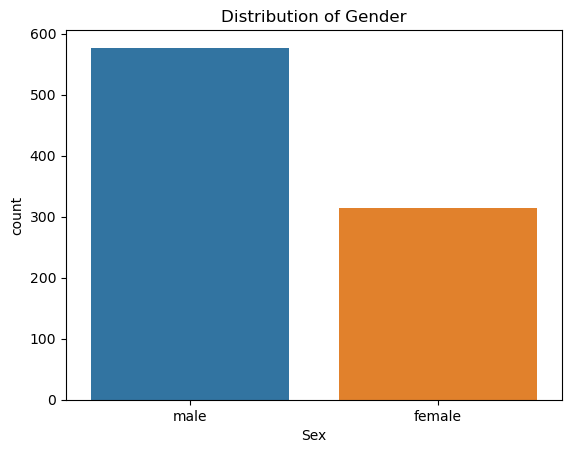

In [23]:
# distribution of 'Sex'
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Gender')
plt.show()

In [24]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
# Converting categorical variables to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [28]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

##### from this above we can see thet male is encoded as '1', female is encoded as '2'

In [29]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

##### from this we can see that Embarked is encoded as 0 for Q, 1 for C, 2 for S

In [30]:
# Defining features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [31]:
# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [33]:
# Building Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [35]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [36]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [37]:
# results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7821229050279329
Confusion Matrix:
[[83 22]
 [17 57]]


In [38]:
# Example data for prediction 
example_data = pd.DataFrame({
    'Pclass': [3],  # Passenger class
    'Sex': [1],  # Gender: i.e male-1, female-0
    'Age': [25],  # Age
    'SibSp': [1],  # Number of siblings/spouses aboard
    'Parch': [0],  # Number of parents/children aboard
    'Fare': [7.5],  # Passenger fare
    'Embarked': [2]  # Port of embarkation: 0 for Q, 1 for C, 2 for S
})


In [39]:
# Making prediction
prediction = model.predict(example_data)

# Maping the prediction to 'Survived' or 'Not Survived'
prediction_result = "Survived" if prediction[0] == 1 else "Not Survived"

print(f"The model predicts that the passenger would '{prediction_result}'.")


The model predicts that the passenger would 'Not Survived'.


In [40]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

In [42]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [43]:
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")

Accuracy: 0.8212290502793296
Confusion Matrix:
[[92 13]
 [19 55]]


In [44]:
# Build a Support Vector Machine (SVM) model

from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.svm import SVC
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [46]:
# Make predictions on the scaled test set
y_pred_svm = model_svm.predict(X_test_scaled)

In [47]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

In [48]:
print(f"Accuracy: {accuracy_svm}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")

Accuracy: 0.8156424581005587
Confusion Matrix:
[[93 12]
 [21 53]]


In [49]:
# Building a Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [50]:
# Making predictions on the scaled test set
y_pred_lr = model_lr.predict(X_test_scaled)

In [51]:
# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)


In [52]:
# results displaying as:
print(f"Accuracy: {accuracy_lr}")
print(f"Confusion Matrix:\n{conf_matrix_lr}")

Accuracy: 0.8044692737430168
Confusion Matrix:
[[90 15]
 [20 54]]


In [53]:
# Build a K-Nearest Neighbors (KNN) model

from sklearn.neighbors import KNeighborsClassifier

k_value = 5  # You can adjust the value of k
model_knn = KNeighborsClassifier(n_neighbors=k_value)
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [54]:
# Making predictions on the scaled test set
y_pred_knn = model_knn.predict(X_test_scaled)

In [55]:
# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [56]:
print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")

Accuracy: 0.8044692737430168
Confusion Matrix:
[[90 15]
 [20 54]]


In [57]:
# Build a Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [58]:
# Making predictions on the scaled test set
y_pred_nb = model_nb.predict(X_test_scaled)

In [59]:
# Evaluating the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

In [60]:
# result as:
print(f"Accuracy: {accuracy_nb}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")

Accuracy: 0.776536312849162
Confusion Matrix:
[[82 23]
 [17 57]]


In [61]:
# Build a Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [62]:
# Making predictions on the scaled test set
y_pred_gb = model_gb.predict(X_test_scaled)

In [63]:
# Evaluating the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

In [64]:
## results
print(f"Accuracy: {accuracy_gb}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")

Accuracy: 0.8100558659217877
Confusion Matrix:
[[93 12]
 [22 52]]


## Now i am fitting stacked models on the dataset

In [65]:
# Initialize base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

In [66]:
# Training base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
# Making predictions using base models
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [68]:
# Creating a DataFrame with base model predictions
base_model_predictions = pd.DataFrame({
    'RandomForest': rf_predictions,
    'GradientBoosting': gb_predictions
})

In [69]:
# Training a meta-model (Logistic Regression in this case) on the base model predictions
meta_model = LogisticRegression(random_state=42)
meta_model.fit(base_model_predictions, y_test)

LogisticRegression(random_state=42)

In [70]:
# Making predictions using the meta-model
stacking_predictions = meta_model.predict(base_model_predictions)

In [71]:
# Evaluating the stacking model
accuracy_stacking = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Model Accuracy: {accuracy_stacking}")

Stacking Model Accuracy: 0.8212290502793296


##### now if we see the accuracy of all models DT-78.2%, RF-82.1%, SVM-81.6%, LR-80.4%, KNN-80.4%, Gussian N B-81%, GradientBoosting-81%,  Stacking model of combining Random forest and GradientBoosting-82.1%,  absorving all the values, RF alone is having higher accuracy compary to all other alone models. And stacking model is also performing well in prediction with having same accuracy of RF model.

##### now lets see the example problem for both these well performed models,

##### already i have predicted for Randeom forest model, it predicted as person is Not survived, now for the same dataset i am predicting using stacking model, let's see

In [72]:
# Example data for prediction 
example_data = pd.DataFrame({
    'Pclass': [3],  # Passenger class
    'Sex': [1],  # Gender: i.e male-1, female-0
    'Age': [25],  # Age
    'SibSp': [1],  # Number of siblings/spouses aboard
    'Parch': [0],  # Number of parents/children aboard
    'Fare': [7.5],  # Passenger fare
    'Embarked': [2]  # Port of embarkation: 0 for Q, 1 for C, 2 for S
})


In [73]:
# Making predictions using the base models
rf_prediction = rf_model.predict(example_data)
gb_prediction = gb_model.predict(example_data)


In [74]:
# Create a DataFrame with base model predictions for the example data
example_base_model_predictions = pd.DataFrame({
    'RandomForest': rf_prediction,
    'GradientBoosting': gb_prediction,
    
})

In [75]:
# Use the trained meta-model to make the final prediction
stacking_example_prediction = meta_model.predict(example_base_model_predictions)

In [76]:
# Display the result
print(f"The stacking model predicts that the passenger would {'Survived' if stacking_example_prediction == 1 else 'Not Survived'}.")

The stacking model predicts that the passenger would Not Survived.


##### from this i would conclude that both the models are pedicting accuratly with each other, and if we have any further data for prediction we can go for prediction